In [1]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics')

from Position_data.Tracking_Data import tracking_data
from EPV_Basics import get_EPV_grid
from epv_utils import is_between
import Basics.Data.Metrica_IO as mio
import numpy as np
import pandas as pd
import torch
from Position_data.PitchControl import pitch_control as pc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from EventData.EventData import event_data, load_metrica_event_data
from statsbombpy import sb

In [2]:
# get Event data
ed = load_metrica_event_data('sample-data-master/data/Sample_Game_2', 'Sample_Game_2_RawEventsData.csv')
ED = event_data(data=ed, data_source='metrica', scale_to_pitch='myPitch')

In [3]:
# get tracking data 
data_dir = 'sample-data-master/data'
game_id = 2
away = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Away')
home = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Home')
td = mio.merge_tracking_data(home, away)
td_object = tracking_data(td, data_source='metrica', scale_to_pitch='myPitch')
print(td_object)

Reading team: away
Reading team: home
tracking_data object of metrica of shape (141156, 56).


(<Figure size 640x480 with 1 Axes>, <Axes: >)

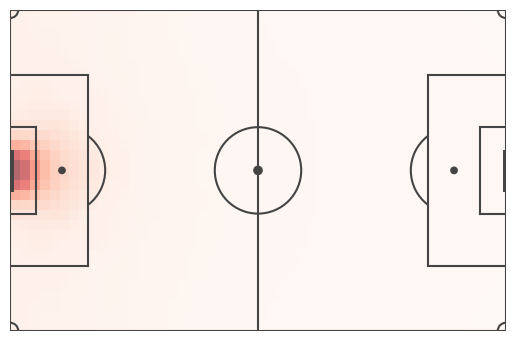

In [4]:
# get EPV grid
epv = get_EPV_grid(fname='FoTD_grid.csv', origin='Friends of Tracking [Laurie Shaw]', td_object=td_object, team = 'Home')
epv.plot_grid()

Current batch: 1/1


(<Figure size 640x480 with 1 Axes>, <Axes: >)

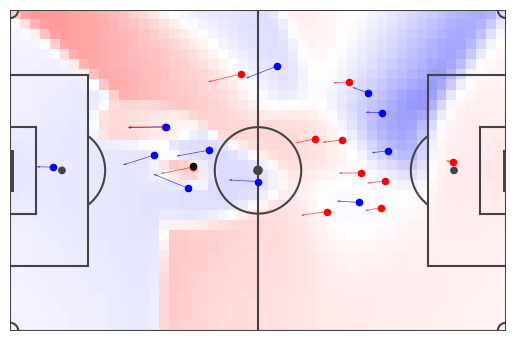

In [5]:
epv.plot_AV_grid(frame=16388, pc_version='Fernandez', pc_implementation='adap', risk=True, pc_first_frame_calc=16300,
                pc_last_frame_calc=16500)

Current batch: 1/1


(<Figure size 640x480 with 1 Axes>, <Axes: >)

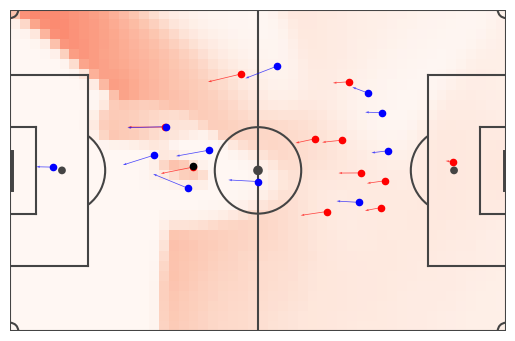

In [6]:
epv.plot_AV_grid(frame=16388, pc_version='Fernandez', pc_implementation='adap', risk=False, pc_first_frame_calc=16300,
                pc_last_frame_calc=16500)

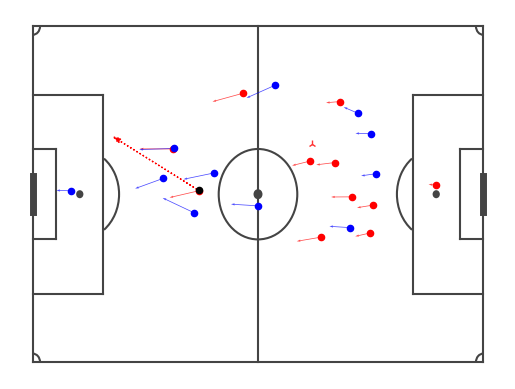

In [7]:
ED.plot_events(event_index=251, td_object=td_object, actions_back=1)

Running Spearman's pitch control computation based on Gauss legendre quadration
Current batch: 1/1


(<Figure size 640x480 with 1 Axes>, <Axes: >)

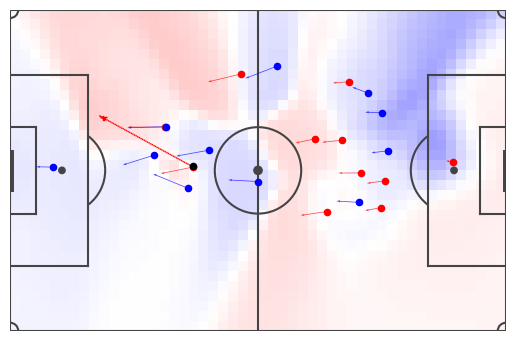

In [8]:
epv.plot_AV_for_event(event_data=ED, event_index=251)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

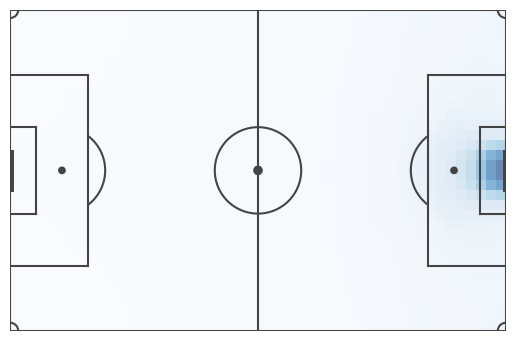

In [9]:
# get EPV grid
epv = get_EPV_grid(fname='FoTD_grid.csv', origin='Friends of Tracking [Laurie Shaw]', td_object=td_object, team = 'Away')
epv.plot_grid()

Running Spearman's pitch control computation based on Gauss legendre quadration
Current batch: 1/1


(<Figure size 640x480 with 1 Axes>, <Axes: >)

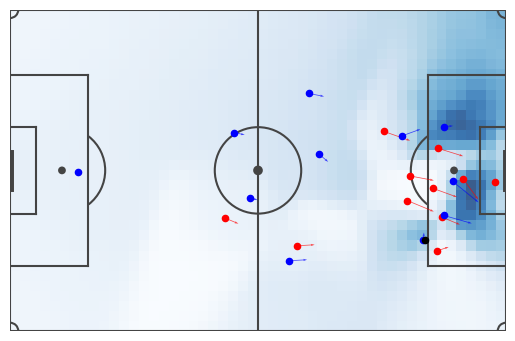

In [10]:
epv.plot_AV_grid(frame=90135, pc_version='Spearman', pc_implementation='GL', risk=False, pc_first_frame_calc=90000,
                pc_last_frame_calc=90250)

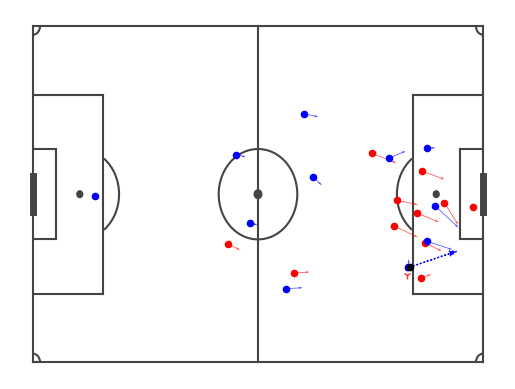

In [11]:
ED.plot_events(event_index=1334, td_object=td_object, actions_back=1)

Running Spearman's pitch control computation based on Gauss legendre quadration
Current batch: 1/1


(<Figure size 640x480 with 1 Axes>, <Axes: >)

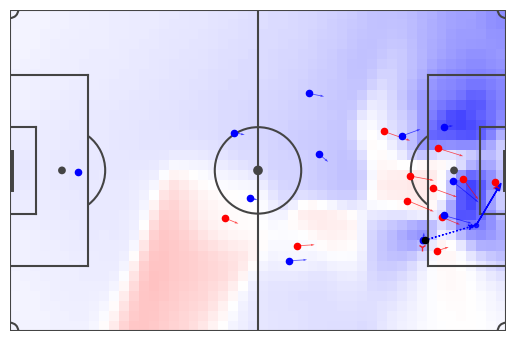

In [14]:
epv.plot_AV_for_event(event_index=1334, event_data=ED, actions_back=1, actions_forward=2)

Running Spearman's pitch control computation based on Gauss legendre quadration
Current batch: 1/1


(<Figure size 640x480 with 1 Axes>, <Axes: >)

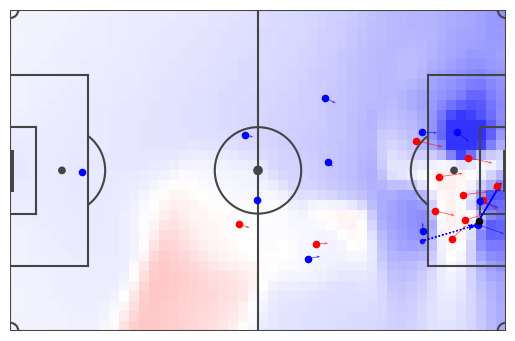

In [15]:
epv.plot_AV_for_event(event_index=1335, event_data=ED, actions_back=1, actions_forward=1)